# Visualize

**Visual Representation of given Data is tried in this notebook**
   
   
**Note 1:** Some Visual representaion of Data is also tried in notebook data_processing.ipynb. Here, some features are analysed through visual representation to decide whether that feature can be used for ML modeling to predict performance of new hire    

**Note 2:**  Some Visual representaion of Data is also tried in notebook data_exploratory_analysis.ipynb. Here, each features distribution, their relation with other features are visually represented and insights are recorded.

**Section 1: Department wise performance of employees**    
* Nearly 90% of the employees belong to 3 departments, they are 1)Sales, 2)Development and 3)Research & Development
* Employees in Department 'Development' tend to perfrom **best**(on an average their rating is 3.09), they account 30% of employees    
* Employees in Department 'Finance'  tend to perfrom **poorly**(on an average their rating is 2.78), **however** they account only 4% of employees  
* Employees in Department 'Sales'    tend to perfrom **poorly**(on an average their rating is 2.86), **however** they account 31% of employees  
* Among all the low(performance rating = 2) rated employees, **maximum** percentage are in Department Sales and Finance   
* Among all the low(performance rating = 2) rated employees, **minimum** percentage are in Department Development and Data Science   
* Among all the high(performance rating = 4) rated employees, **maximum** percentage are in Department Development   
  
  
**Section 2: Department wise insights with respect to other features**  
* Average Environment satisfaction seems to vary between 2.63 and 2.95, where as actual satisfaction rating range between 1 to 4.   
* There is no significant difference in the average environment satisfaction across department.   
* Data Science Department(with less than 2% of the employees) had maximum salary hike on average.    
* Human Resource Department(with 4.5% of the employees) had minimum salary hike on average. 
* On average, employees from Sales department(31% employees) get promoted every 2.5 years   
* On average, employees from 3 departments(Finance, HR, Data Science) accounting for about 10% employees get promoted in less than 2 years   
* Employees from Data Science department have spent least number of years in current role(3 years on an average).   
* Employees from Finance and Sales department spend more than 4.5 years in same role on an average.
* Average age in each department is almost same`





In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('Employee_Data.xls', index_col='EmpNumber')

In [3]:
df.head(2)

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
EmpNumber,,,,,,,,,,,,,,,,,,,,,
E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,...,4,10,2,2,10,7,0,8,No,3
E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,...,4,20,2,3,7,7,1,7,No,3


In [4]:
cat_columns = df.select_dtypes(include=['object']).columns.tolist()
num_columns = df.select_dtypes(exclude=['object']).columns.tolist()


discr_num_cols = []
conti_num_cols = []
for col in num_columns:
    if df[col].value_counts().size <= 7:
        discr_num_cols.append(col)
    else:
        conti_num_cols.append(col)
        


print('Categorical Columns : \n', cat_columns)
print()
print('Numerical Columns : \n', num_columns)
print()
print('Discete Numerical Columns : \n', discr_num_cols)
print()
print('Continuous Columns : \n', conti_num_cols)



Categorical Columns : 
 ['Gender', 'EducationBackground', 'MaritalStatus', 'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency', 'OverTime', 'Attrition']

Numerical Columns : 
 ['Age', 'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction', 'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel', 'EmpJobSatisfaction', 'NumCompaniesWorked', 'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction', 'TotalWorkExperienceInYears', 'TrainingTimesLastYear', 'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'PerformanceRating']

Discete Numerical Columns : 
 ['EmpEducationLevel', 'EmpEnvironmentSatisfaction', 'EmpJobInvolvement', 'EmpJobLevel', 'EmpJobSatisfaction', 'EmpRelationshipSatisfaction', 'TrainingTimesLastYear', 'EmpWorkLifeBalance', 'PerformanceRating']

Continuous Columns : 
 ['Age', 'DistanceFromHome', 'EmpHourlyRate', 'NumCompaniesWorked', 'EmpLastSalaryHikePercent', 'TotalWorkEx

In [5]:
#Utility/Useful functions

def dispAvgLabelOnBarTop(ax):
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + ((p.get_width() - 0.5) / 2.), p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')
        

EmpDepartmetCountDict = df.EmpDepartment.value_counts().to_dict()
TotalEmployees = df.EmpDepartment.value_counts().sum()
deptList = df.EmpDepartment.value_counts().index.to_list()
def dispEmpCountPercent(ax):    
    i=0
    for p in ax.patches:
        ax.annotate(format((100 * EmpDepartmetCountDict[deptList[i]])/TotalEmployees, '.2f')+'%\nEmployees',
                (p.get_x() + ((p.get_width()) / 2.), p.get_height()/2.), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points',
               )
        i += 1;


deptColorDict = {}
def reserveColorToEachDept(ax):
    for i, c in enumerate(ax._get_lines.prop_cycler):
        if i >= len(deptList):
            break
        #Update deptColorDict    
        deptColorDict[deptList[i]] = c['color']
    

## Section 1: Department wise Performance of the employees

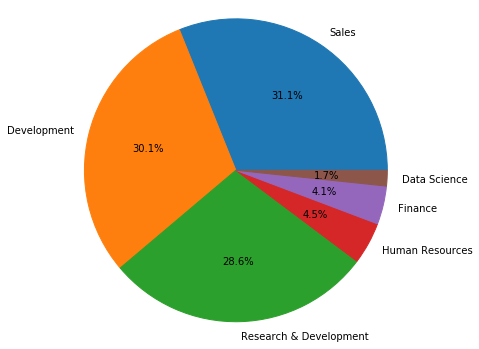

In [6]:
fig, ax = plt.subplots(1,1,figsize=(6, 6))

#Reserve one color to each of the department
reserveColorToEachDept(ax)

    
ax.pie(df.EmpDepartment.value_counts().values.tolist(), 
        labels=deptList, 
        autopct='%1.1f%%',
       )

for i, p in enumerate(ax.patches):
    p.set_color(deptColorDict[deptList[i]])
    
ax.axis('equal'); 



**Insight 1:**  
Nearly 90% of the employees belong to 3 departments, they are 1)Sales, 2)Development and 3)Research & Development

#### Performance rating distribution across the company

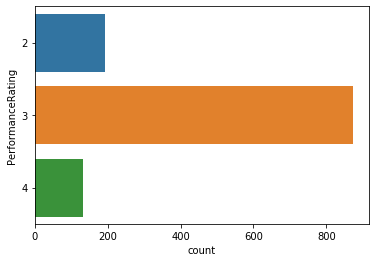

In [7]:
sns.countplot(y="PerformanceRating", data=df);

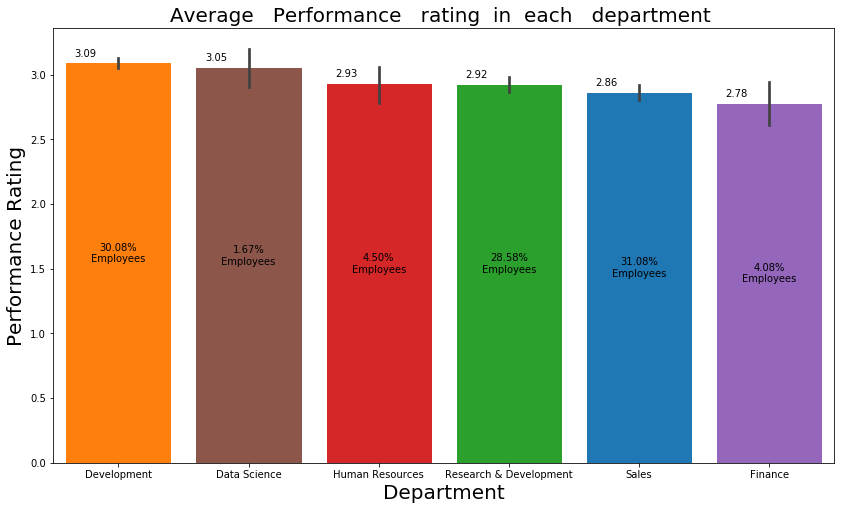

In [8]:
fig, ax = plt.subplots(figsize=(14, 8))
deptList = df.groupby('EmpDepartment').mean().PerformanceRating.sort_values(ascending=False).index.tolist()
sns.barplot(x="EmpDepartment", y="PerformanceRating", 
            ax=ax, 
            order=deptList,
            data=df);

    
ax.set_title('Average   Performance   rating  in  each   department ', fontdict={'fontsize' : 20});
ax.set_ylabel('Performance Rating', fontdict={'fontsize' : 20});
ax.set_xlabel('Department', fontdict={'fontsize' : 20});

for i, p in enumerate(ax.patches):
    p.set_color(deptColorDict[deptList[i]])

dispAvgLabelOnBarTop(ax);

dispEmpCountPercent(ax);    


In [9]:
df.groupby(by='EmpDepartment')['PerformanceRating'].mean()

EmpDepartment
Data Science              3.050000
Development               3.085873
Finance                   2.775510
Human Resources           2.925926
Research & Development    2.921283
Sales                     2.860590
Name: PerformanceRating, dtype: float64

**Insight 2:**   
1. Employees in Department 'Development' tend to perfrom **best**(on an average their rating is 3.09), they account 30% of employees    
2. Employees in Department 'Finance'  tend to perfrom **poorly**(on an average their rating is 2.78), **however** they account only 4% of employees  
2. Employees in Department 'Sales'    tend to perfrom **poorly**(on an average their rating is 2.86), **however** they account 31% of employees  

### Analyzing each department separately

In [10]:
df.groupby(by='EmpDepartment')['PerformanceRating'].value_counts()

EmpDepartment           PerformanceRating
Data Science            3                     17
                        4                      2
                        2                      1
Development             3                    304
                        4                     44
                        2                     13
Finance                 3                     30
                        2                     15
                        4                      4
Human Resources         3                     38
                        2                     10
                        4                      6
Research & Development  3                    234
                        2                     68
                        4                     41
Sales                   3                    251
                        2                     87
                        4                     35
Name: PerformanceRating, dtype: int64

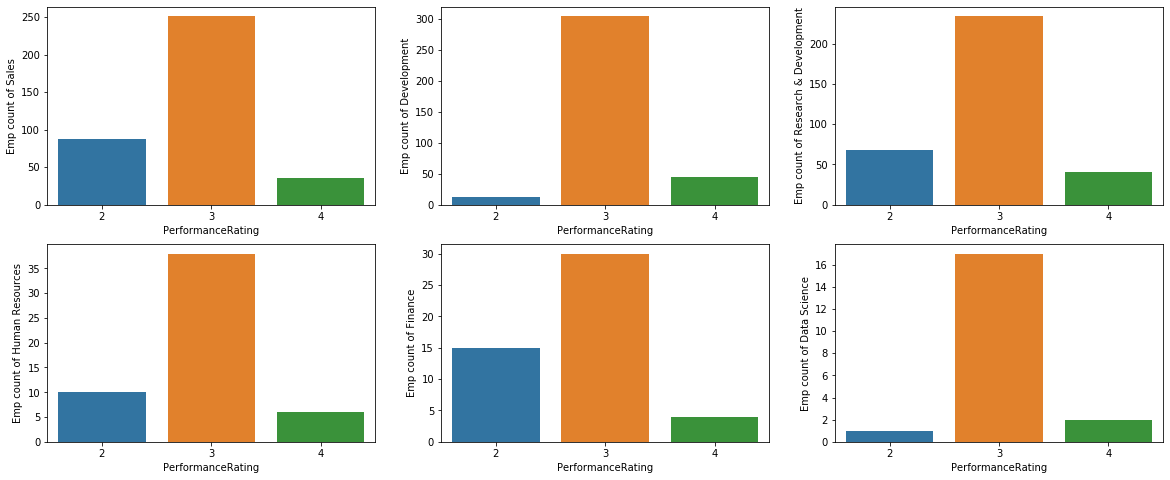

In [11]:
f, a = plt.subplots(2,int(df.EmpDepartment.value_counts().index.size/2),figsize=(20, 8))

for i,dept in enumerate(df.EmpDepartment.value_counts().index):
    ax = sns.countplot('PerformanceRating',data=df[df.EmpDepartment == dept], ax=a[int(i/3),i%3])
    ax.set(ylabel='Emp count of '+dept)

In [12]:
deptPerf = df.loc[:,['EmpDepartment','PerformanceRating']].copy()

In [13]:
department = pd.get_dummies(deptPerf['EmpDepartment'])
perfRating = pd.DataFrame(deptPerf['PerformanceRating'])
deptRating = pd.concat([department,perfRating],axis=1)

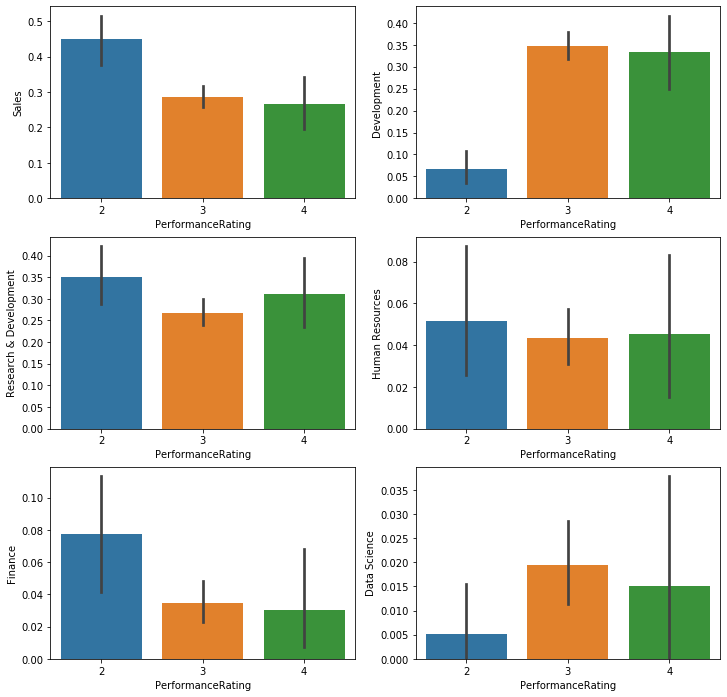

In [14]:
f, a = plt.subplots(3,int(df.EmpDepartment.value_counts().index.size/3),figsize=(12, 12))

for i,dept in enumerate(df.EmpDepartment.value_counts().index):
    ax = sns.barplot('PerformanceRating', dept, data=deptRating, ax=a[int(i/2),i%2])

**Insight 5:**  
Among all the low(performance rating = 2) rated employees, **maximum** percentage are in Department Sales and Finance   
Among all the low(performance rating = 2) rated employees, **minimum** percentage are in Department Development and Data Science   

**Insight 6:**  
Among all the high(performance rating = 4) rated employees, **maximum** percentage are in Department Development   

## Section 2: Department wise insights with respect to other features

#### EmpDepartment vs EmpEnvironmentSatisfaction

In [15]:
df.EmpEnvironmentSatisfaction.value_counts()

3    367
4    361
2    242
1    230
Name: EmpEnvironmentSatisfaction, dtype: int64

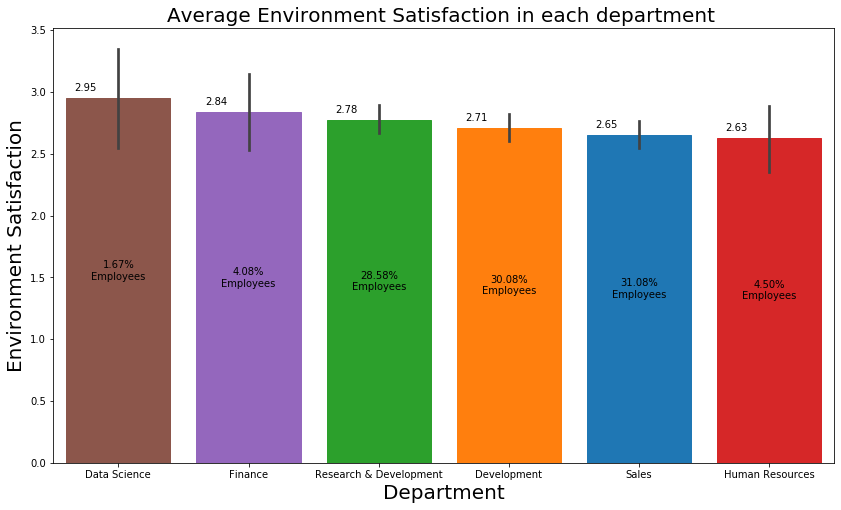

In [16]:
fig, ax = plt.subplots(figsize=(14, 8))
deptList = df.groupby('EmpDepartment').mean().EmpEnvironmentSatisfaction.sort_values(ascending=False).index.tolist()
sns.barplot(x="EmpDepartment", y="EmpEnvironmentSatisfaction", 
            ax=ax, 
            order=deptList,
            data=df);

ax.set_title('Average Environment Satisfaction in each department ', fontdict={'fontsize' : 20});
ax.set_ylabel('Environment Satisfaction', fontdict={'fontsize' : 20});
ax.set_xlabel('Department', fontdict={'fontsize' : 20});

for i, p in enumerate(ax.patches):
    p.set_color(deptColorDict[deptList[i]])

dispAvgLabelOnBarTop(ax);

dispEmpCountPercent(ax);    


**Insight 3:**  
Average Environment satisfaction seems to vary between 2.63 and 2.95, where as actual satisfaction rating range between 1 to 4.      
There is no significant difference in the average environment satisfaction across department. 

#### EmpLastSalaryHikePercent vs EmpDepartment

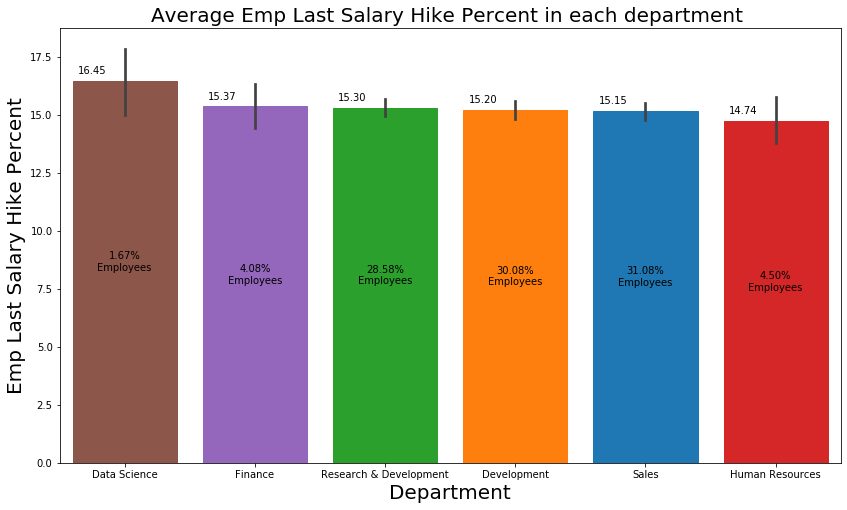

In [17]:
fig, ax = plt.subplots(figsize=(14, 8))
deptList = df.groupby('EmpDepartment').mean().EmpLastSalaryHikePercent.sort_values(ascending=False).index.tolist()

sns.barplot(x="EmpDepartment", y="EmpLastSalaryHikePercent", 
            ax=ax, 
            order=deptList,
            data=df);

ax.set_title('Average Emp Last Salary Hike Percent in each department ', fontdict={'fontsize' : 20});
ax.set_ylabel('Emp Last Salary Hike Percent', fontdict={'fontsize' : 20});
ax.set_xlabel('Department', fontdict={'fontsize' : 20});

for i, p in enumerate(ax.patches):
    p.set_color(deptColorDict[deptList[i]])

dispAvgLabelOnBarTop(ax);

dispEmpCountPercent(ax);    


**Insight 4:**   
Data Science Department(with less than 2% of the employees) had maximum salary hike on average.    
Human Resource Department(with 4.5% of the employees) had minimum salary hike on average. 


#### YearsSinceLastPromotion vs EmpDepartment

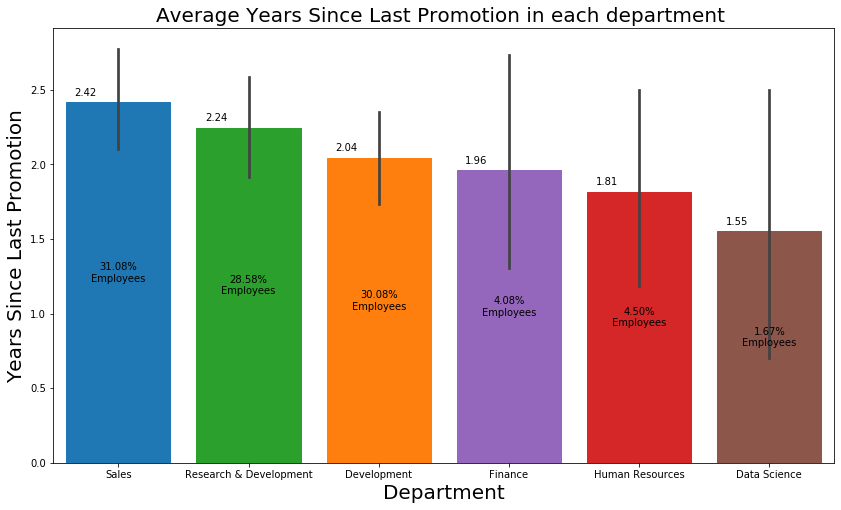

In [18]:
fig, ax = plt.subplots(figsize=(14, 8))
deptList = df.groupby('EmpDepartment').mean().YearsSinceLastPromotion.sort_values(ascending=False).index.tolist();

sns.barplot(x="EmpDepartment", y="YearsSinceLastPromotion", 
            ax=ax, 
            order=deptList,
            data=df);

ax.set_title('Average Years Since Last Promotion in each department ', fontdict={'fontsize' : 20});
ax.set_ylabel('Years Since Last Promotion', fontdict={'fontsize' : 20});
ax.set_xlabel('Department', fontdict={'fontsize' : 20});

for i, p in enumerate(ax.patches):
    p.set_color(deptColorDict[deptList[i]])

dispAvgLabelOnBarTop(ax);

dispEmpCountPercent(ax);    


**Insight 5:**  
On average, employees from Sales department(31% employees) get promoted every 2.5 years   
On average, employees from 3 departments(Finance, HR, Data Science) accounting for about 10% employees get promoted in less than 2 years   

#### ExperienceYearsInCurrentRole vs EmpDepartment

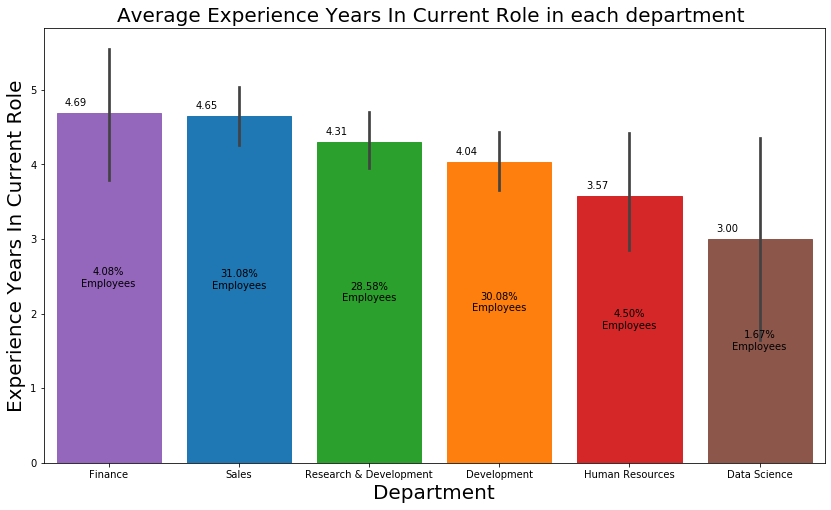

In [19]:
fig, ax = plt.subplots(figsize=(14, 8))
deptList = df.groupby('EmpDepartment').mean().ExperienceYearsInCurrentRole.sort_values(ascending=False).index.tolist();

sns.barplot(x="EmpDepartment", y="ExperienceYearsInCurrentRole", 
            ax=ax, 
            order=deptList,
            data=df);

ax.set_title('Average Experience Years In Current Role in each department ', fontdict={'fontsize' : 20});
ax.set_ylabel('Experience Years In Current Role', fontdict={'fontsize' : 20});
ax.set_xlabel('Department', fontdict={'fontsize' : 20});

for i, p in enumerate(ax.patches):
    p.set_color(deptColorDict[deptList[i]])

dispAvgLabelOnBarTop(ax);

dispEmpCountPercent(ax);    


**Insight 6:**   
Employees from Data Science department have spent least number of years in current role(3 years on an average).   
Employees from Finance and Sales department spend more than 4.5 years in same role on an average.


#### Age vs EmpDepartment

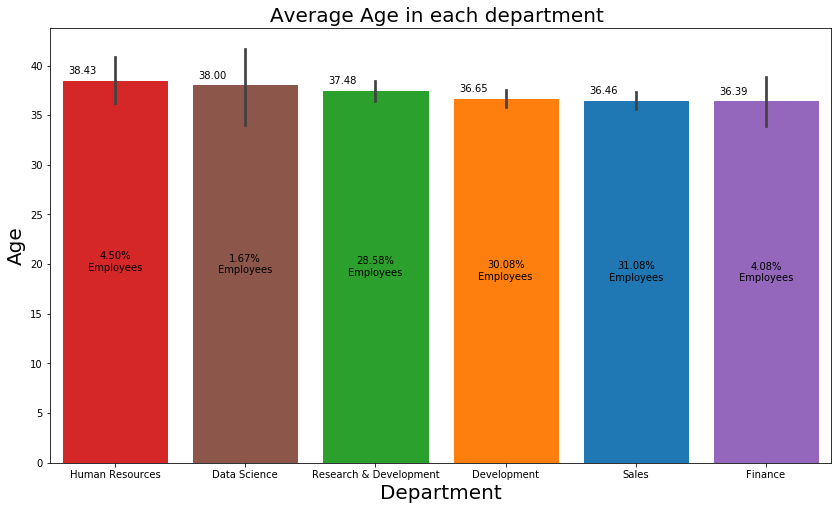

In [20]:
fig, ax = plt.subplots(figsize=(14, 8))
deptList=df.groupby('EmpDepartment').mean().Age.sort_values(ascending=False).index.tolist()

sns.barplot(x="EmpDepartment", y="Age", 
            ax=ax, 
            order=deptList,
            data=df);

ax.set_title('Average Age in each department ', fontdict={'fontsize' : 20});
ax.set_ylabel('Age', fontdict={'fontsize' : 20});
ax.set_xlabel('Department', fontdict={'fontsize' : 20});

for i, p in enumerate(ax.patches):
    p.set_color(deptColorDict[deptList[i]])

dispAvgLabelOnBarTop(ax);

dispEmpCountPercent(ax);    


**Insight 7:**  
Average age in each department is almost same

#### All continuous features are analyzed against each department

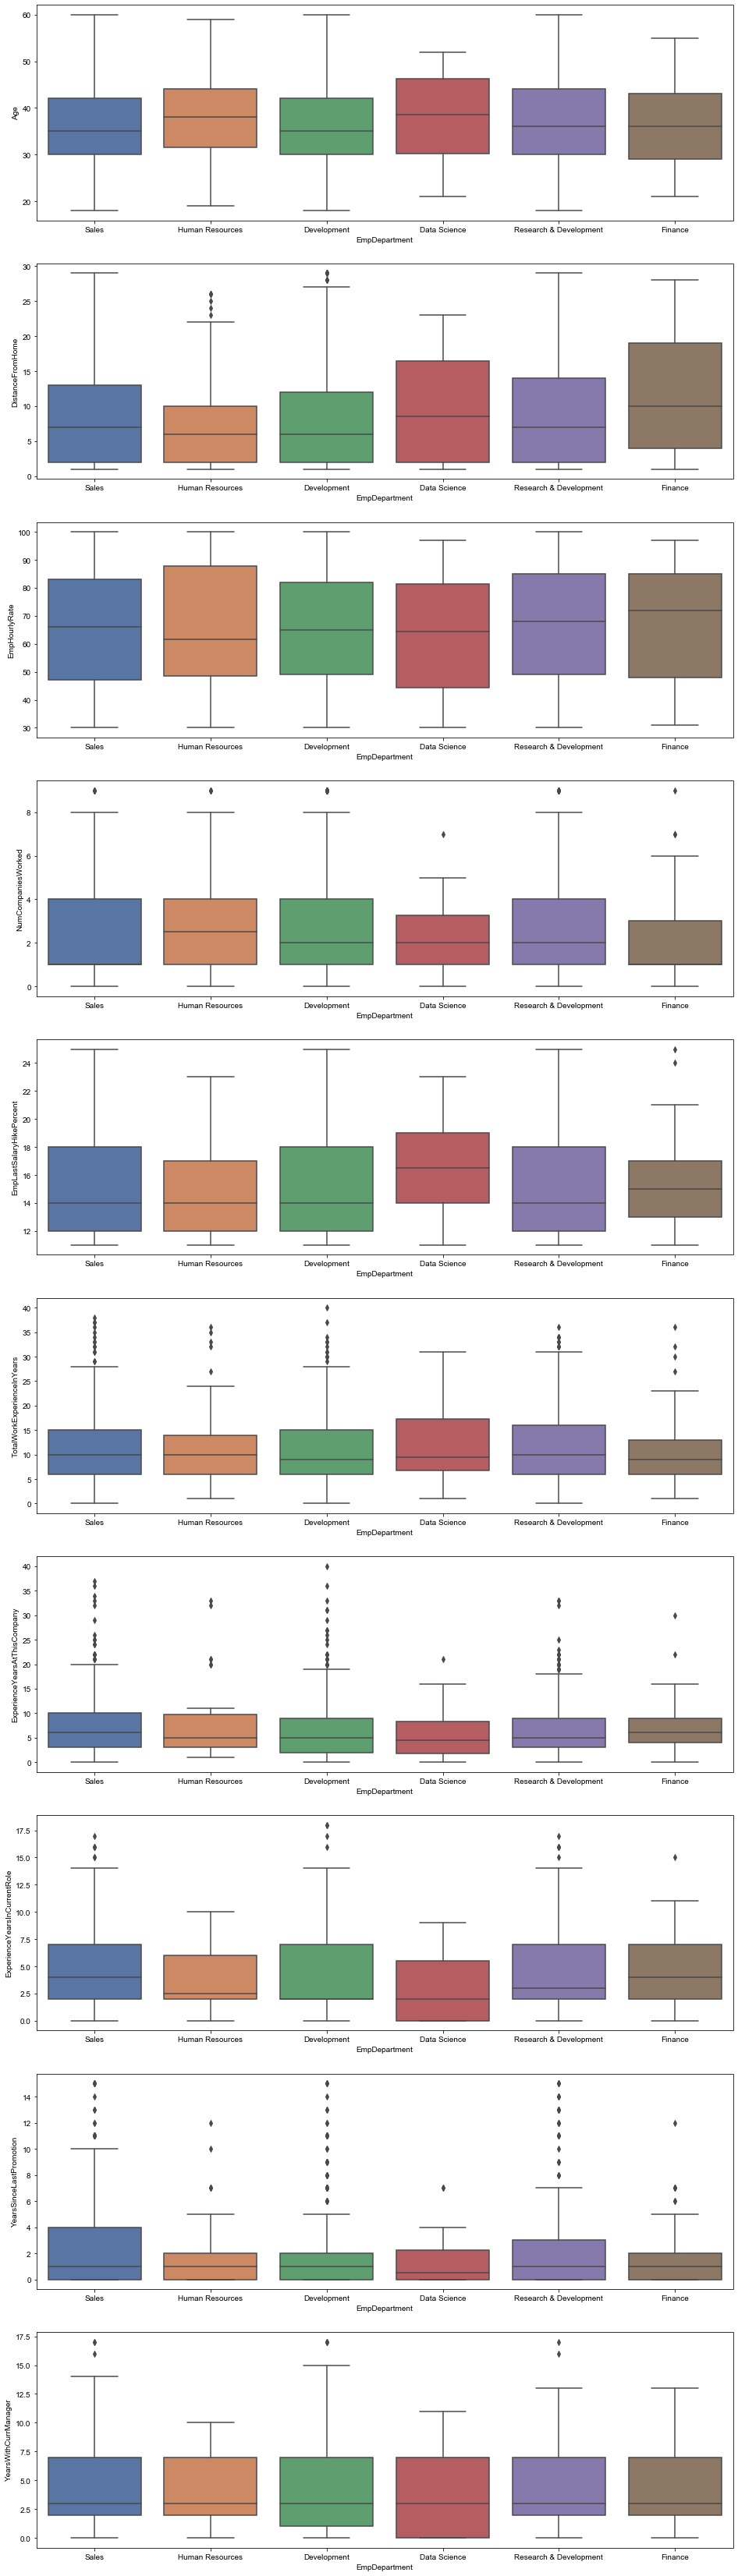

In [21]:
f, a = plt.subplots(10,1,figsize=(16, 60))
sns.set(style='white', color_codes=True)

for i,feature in enumerate(conti_num_cols):
    sns.boxplot(data=df, x='EmpDepartment', y=feature, ax=a[i]);

**-------------------------END---------------------------**